# Decision Tree

- 머신러닝 알고리즘 중 가장 직관적인 것 중 하나
- 특정 기준을 정하고 그 기준에 맞는 서브트리를 만들어 가는 식
- 분리의 목적이 되는 점은 지니계수, 엔트로피 등이 사용됨
- 변수들을 정규화하는 등의 작업이 없어도 잘 작동하는 장점이 있음

## 절차
1. 한 변수 기준으로 정렬
2. 구간 별로 해당하는 정보획득/순도증가 등의 값을 구함
    - 엔트로피: weighted sum of log_2(p_k)
    - 지니: sum of p x (1-p)
3. 모든 변수에 대해서 수행
4. 가장 좋은 값과 지점을 택하여 분기

## 매개변수
- max_depth: 트리 최대 깊이
- max_leaf_nodes: 말단 노드의 최대 수
- max_features: 최적 분할을 위한 최대 고려 변수 수
- min_samples_split: 노드를 분할하기 위한 최소한의 샘플 자료 수
- min_samples_leaf: 말단 노드가 되기 위한 최소 샘플 수 

## variable importance 도출
- 사용된 변수가 지니/엔트로피를 평균적으로 얼마나 줄였는지를 나타냄
- 양/음 의방향을 나타내지 않으며 더 깊은 관계가 존재할 수 있음
- 중요하지 않다고 나온것이 정말 중요하지 않다기 보다 다른 변수가 포함하고 있을 가능성 존재

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv('../1.clustering/titanic.csv')

target = data['Survived']
data = data.drop(['PassengerId', 'Survived'], axis=1)

def sex(a):
    if a == 'male':
        return 0
    else:
        return 1
    
def emb(a):
    if a == 'S':
        return 0
    elif a == 'Q':
        return 1
    else:
        return 2
    
data['Sex'] = data['Sex'].map(sex)
data['Embarked'] = data['Embarked'].map(emb)

train_X, test_X, train_y, test_y = train_test_split(data, target, test_size=0.3, random_state=2019, shuffle=True)

In [2]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=2019).fit(train_X, train_y)

In [3]:
import graphviz
from sklearn.tree import export_graphviz

# export_graphviz(clf, out_file='tree.dot', class_names=['0', '1'], feature_names=train_X.columns)

# with open('./tree.dot') as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)

In [4]:
# dot = graphviz.Source(dot_graph) # dot_graph의 source 저장

# dot.render(filename='tree.png')

In [5]:
pred_y = clf.predict(test_X)

In [6]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_y, pred_y))

0.6869158878504673


In [7]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=2019, max_depth=9, max_leaf_nodes=3).fit(train_X, train_y)
pred_y = clf.predict(test_X)
print(accuracy_score(test_y, pred_y))

0.7850467289719626


In [8]:
# export_graphviz(clf, out_file='tree.dot', class_names=['0', '1'], feature_names=train_X.columns)

# with open('./tree.dot') as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)

# dot = graphviz.Source(dot_graph) # dot_graph의 source 저장

# dot.render(filename='tree.png')

In [9]:
clf.feature_importances_

array([0.25091572, 0.74908428, 0.        , 0.        , 0.        ,
       0.        , 0.        ])

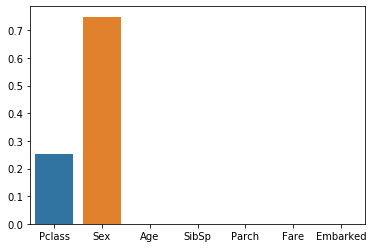

In [10]:
import seaborn as sns

sns.barplot(x=train_X.columns, y = clf.feature_importances_)

In [11]:
clf.predict_proba(test_X)

array([[0.78412698, 0.21587302],
       [0.57575758, 0.42424242],
       [0.78412698, 0.21587302],
       [0.78412698, 0.21587302],
       [0.05982906, 0.94017094],
       [0.05982906, 0.94017094],
       [0.78412698, 0.21587302],
       [0.78412698, 0.21587302],
       [0.78412698, 0.21587302],
       [0.57575758, 0.42424242],
       [0.78412698, 0.21587302],
       [0.05982906, 0.94017094],
       [0.57575758, 0.42424242],
       [0.78412698, 0.21587302],
       [0.05982906, 0.94017094],
       [0.78412698, 0.21587302],
       [0.57575758, 0.42424242],
       [0.78412698, 0.21587302],
       [0.78412698, 0.21587302],
       [0.78412698, 0.21587302],
       [0.78412698, 0.21587302],
       [0.05982906, 0.94017094],
       [0.78412698, 0.21587302],
       [0.78412698, 0.21587302],
       [0.05982906, 0.94017094],
       [0.78412698, 0.21587302],
       [0.05982906, 0.94017094],
       [0.78412698, 0.21587302],
       [0.78412698, 0.21587302],
       [0.78412698, 0.21587302],
       [0.